## Problem Statment

Task 1--> Prepare a complete data analysis report on the given data.
Tas 2k --> -Create a predictive model with implementation of different classifiers o  
liver patient diseases dataset to predict liver diseases.
sk 3T a--> :- Create an analysis to show on what basis you have designed yur
model.

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns

In [2]:
data=pd.read_csv('liver_patient.csv',names=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_Globulin_Ratio','Target'])

## Basic Checks

In [3]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_Globulin_Ratio      579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [6]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [7]:
data.value_counts('Target')

Target
1    416
2    167
dtype: int64

In [8]:
data.Target.unique()

array([1, 2], dtype=int64)

## Domain Analysis

1. Age: Older individuals are more likely to develop liver disease due to age-related    liver function decline.
2. Gender: Gender contain male and female category only.
3. Total Bilirubin: Elevated levels of total bilirubin indicate liver dysfunction,       such as jaundice, bile duct obstruction, or liver disease. High values suggest        liver damage.
4. Direct Bilirubin: Elevated direct bilirubin suggests liver or bile duct issues,       such as cholestasis, where the liver is unable to process bilirubin properly.
5. Alkaline Phosphatase (ALP): High ALP levels indicate liver or bile duct problems.     It can signal conditions like cholestasis, liver disease, or bile duct                obstructions.
6. Alanine Aminotransferase (ALT): ALT is specific to the liver. Elevated levels are     a key marker of liver inflammation or damage, commonly seen in hepatitis or fatty     liver disease.
7. Aspartate Aminotransferase (AST): AST also indicates liver injury, but it is less     liver-specific. It can be elevated due to liver, heart, or muscle injury. The         ALT/AST ratio helps diagnose liver disease type.
8. Total Proteins: The liver produces many proteins, so low total protein levels         indicate poor liver function, such as in cirrhosis or liver failure.
9. Albumin: Low albumin levels are a sign of liver dysfunction or cirrhosis, as the      liver cannot produce enough albumin in these conditions.
10. Albumin/Globulin Ratio (A/G Ratio): A low A/G ratio suggests liver disease,          especially cirrhosis, where the liver fails to produce adequate albumin and           globulin levels change.
11. Target: The target variable likely indicates the presence (1) or absence (0) of      liver disease, making it the primary outcome variable in the analysis.

## EDA

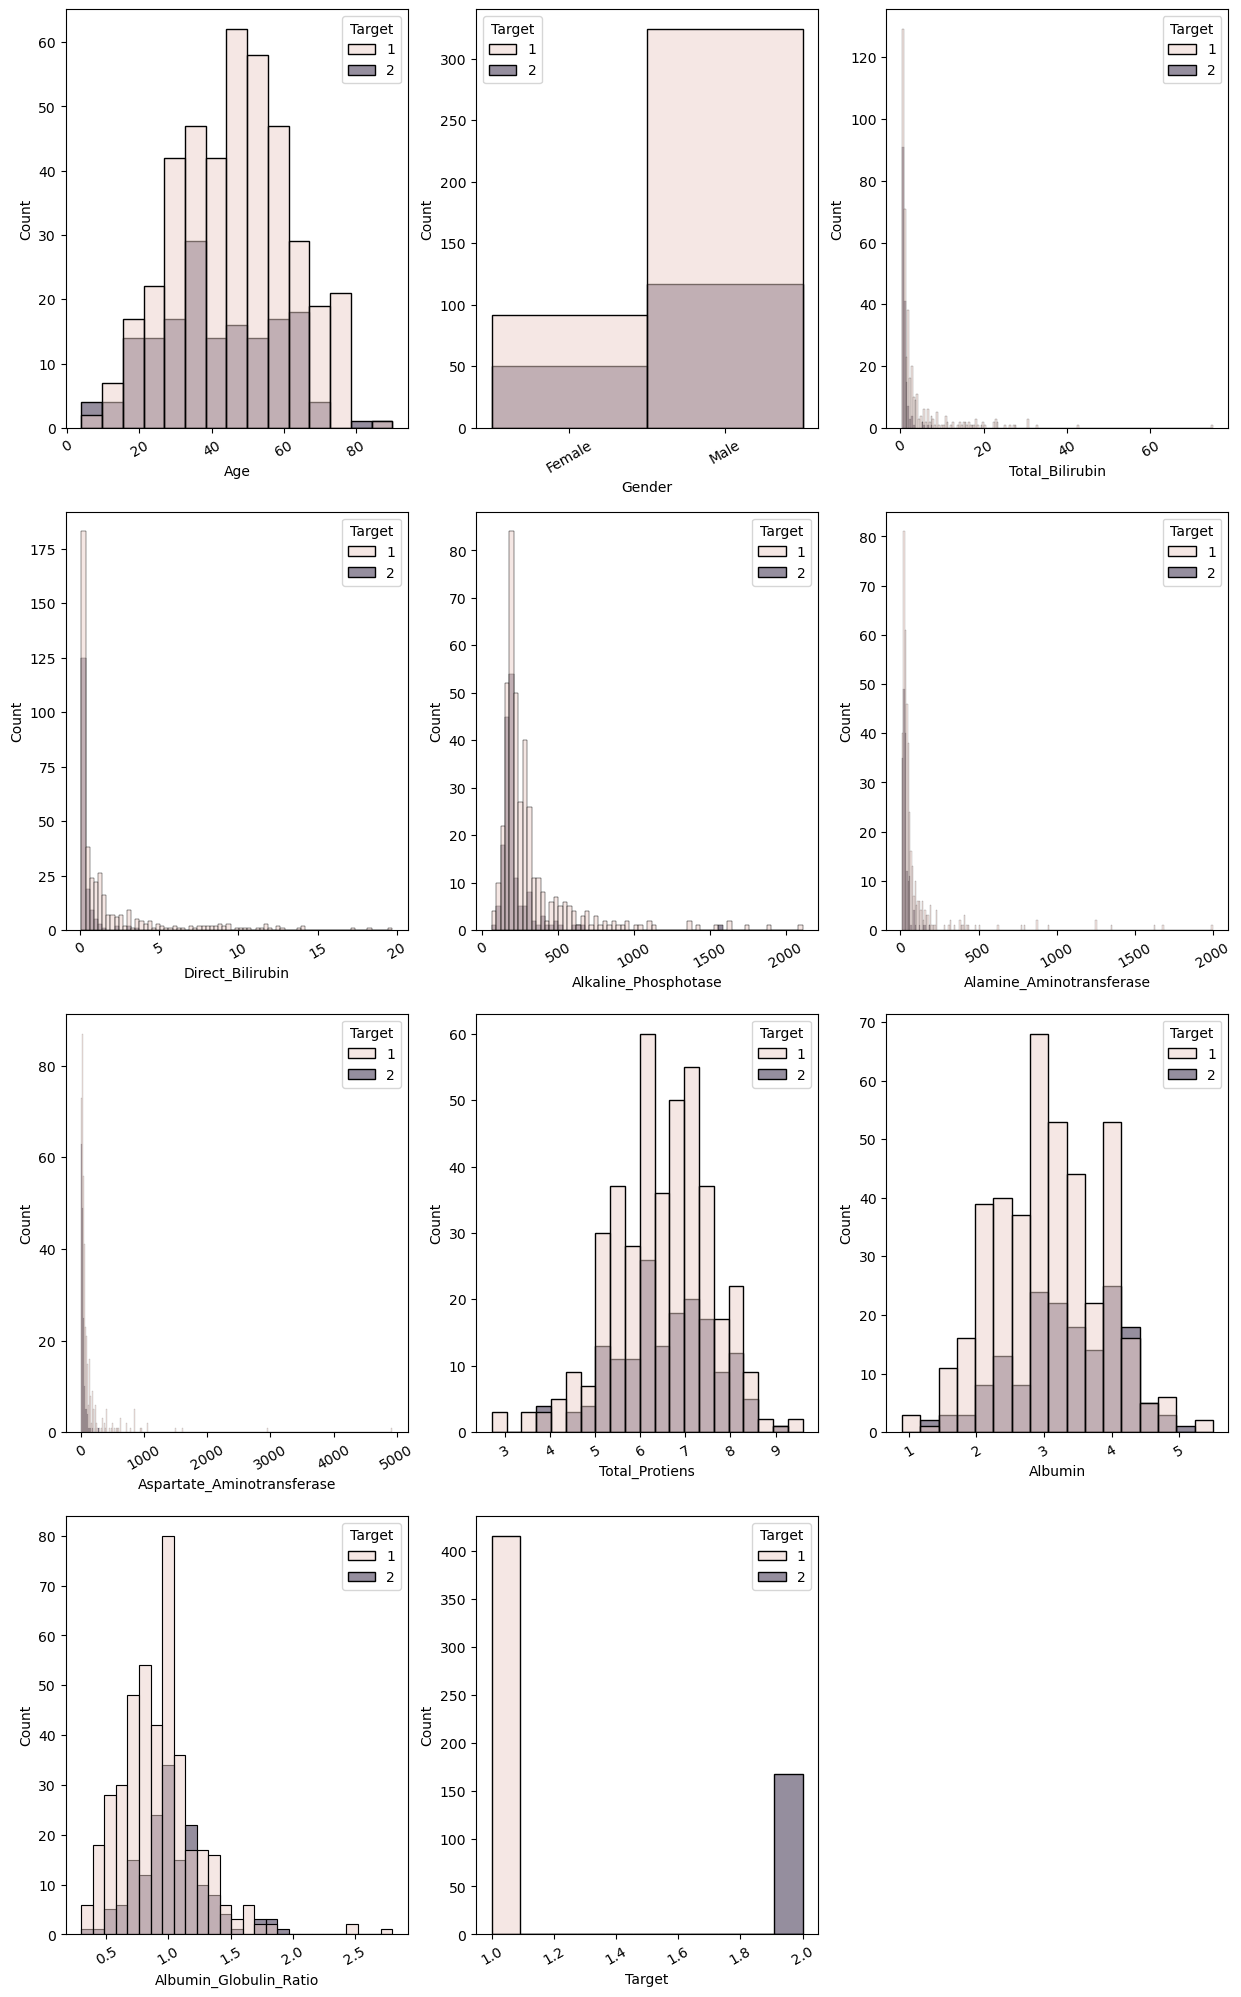

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(15,25),facecolor='white')
plotnumber=1
for column in data:
    ax=plt.subplot(4,3,plotnumber)
    sns.histplot(x=data[column],hue=data['Target'])
    plt.xlabel(column)
    plt.xticks(rotation=30)
    plotnumber+=1
plt.show()
plt.tight_layout()

Insights-->
1. From above graph you can see most of the data is positively skewed.
2. some of the data is fairly normal.

In [10]:
# Also you can use sweetviz for better EDA

In [11]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Axes: xlabel='Direct_Bilirubin', ylabel='Total_Bilirubin'>

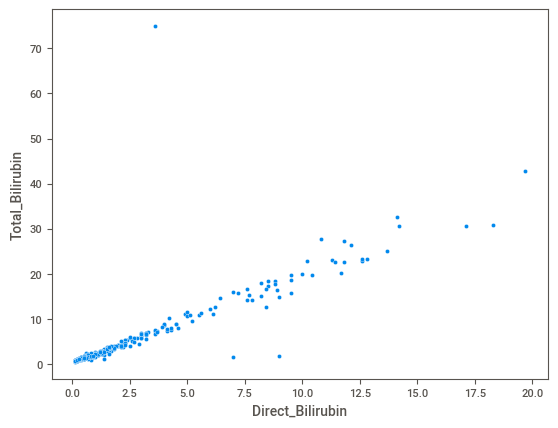

In [12]:
sns.scatterplot(x='Direct_Bilirubin',y='Total_Bilirubin',data=data)

<Axes: xlabel='Albumin', ylabel='Total_Protiens'>

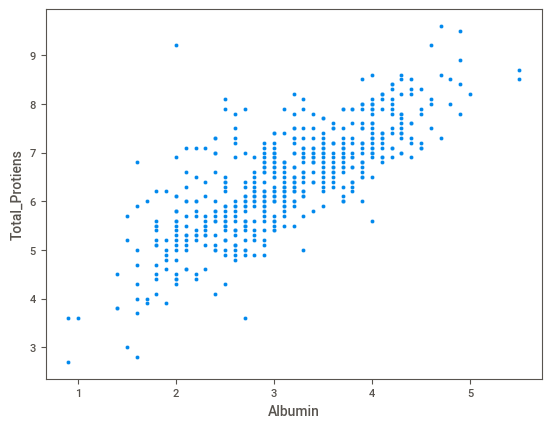

In [13]:
sns.scatterplot(x='Albumin',y='Total_Protiens',data=data)

<Axes: xlabel='Albumin', ylabel='Albumin_Globulin_Ratio'>

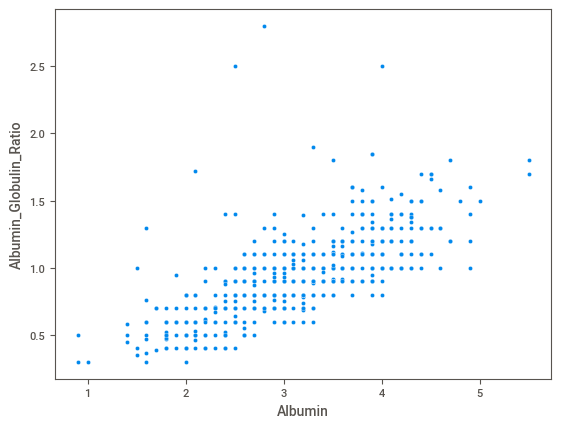

In [14]:
sns.scatterplot(x='Albumin',y='Albumin_Globulin_Ratio',data=data)

<Axes: ylabel='Target'>

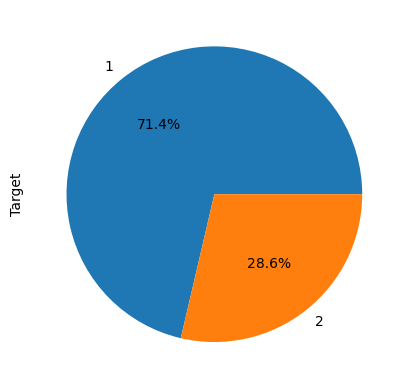

In [53]:
data.Target.value_counts().plot(kind='pie',autopct='%1.1f%%')

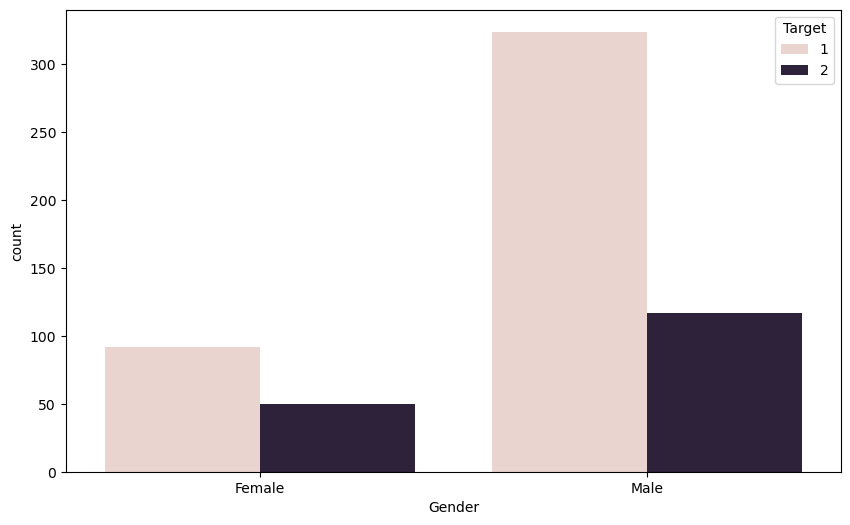

In [56]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Gender',data=data,hue='Target')

<Axes: xlabel='Age', ylabel='Count'>

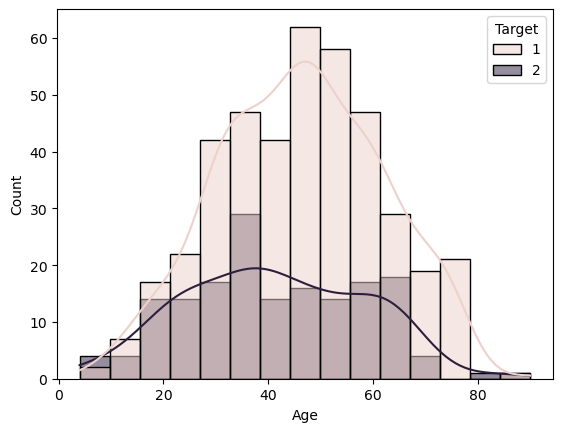

In [71]:
sns.histplot(x='Age',kde=True,hue='Target',data=data)

Text(0, 0.5, 'people count')

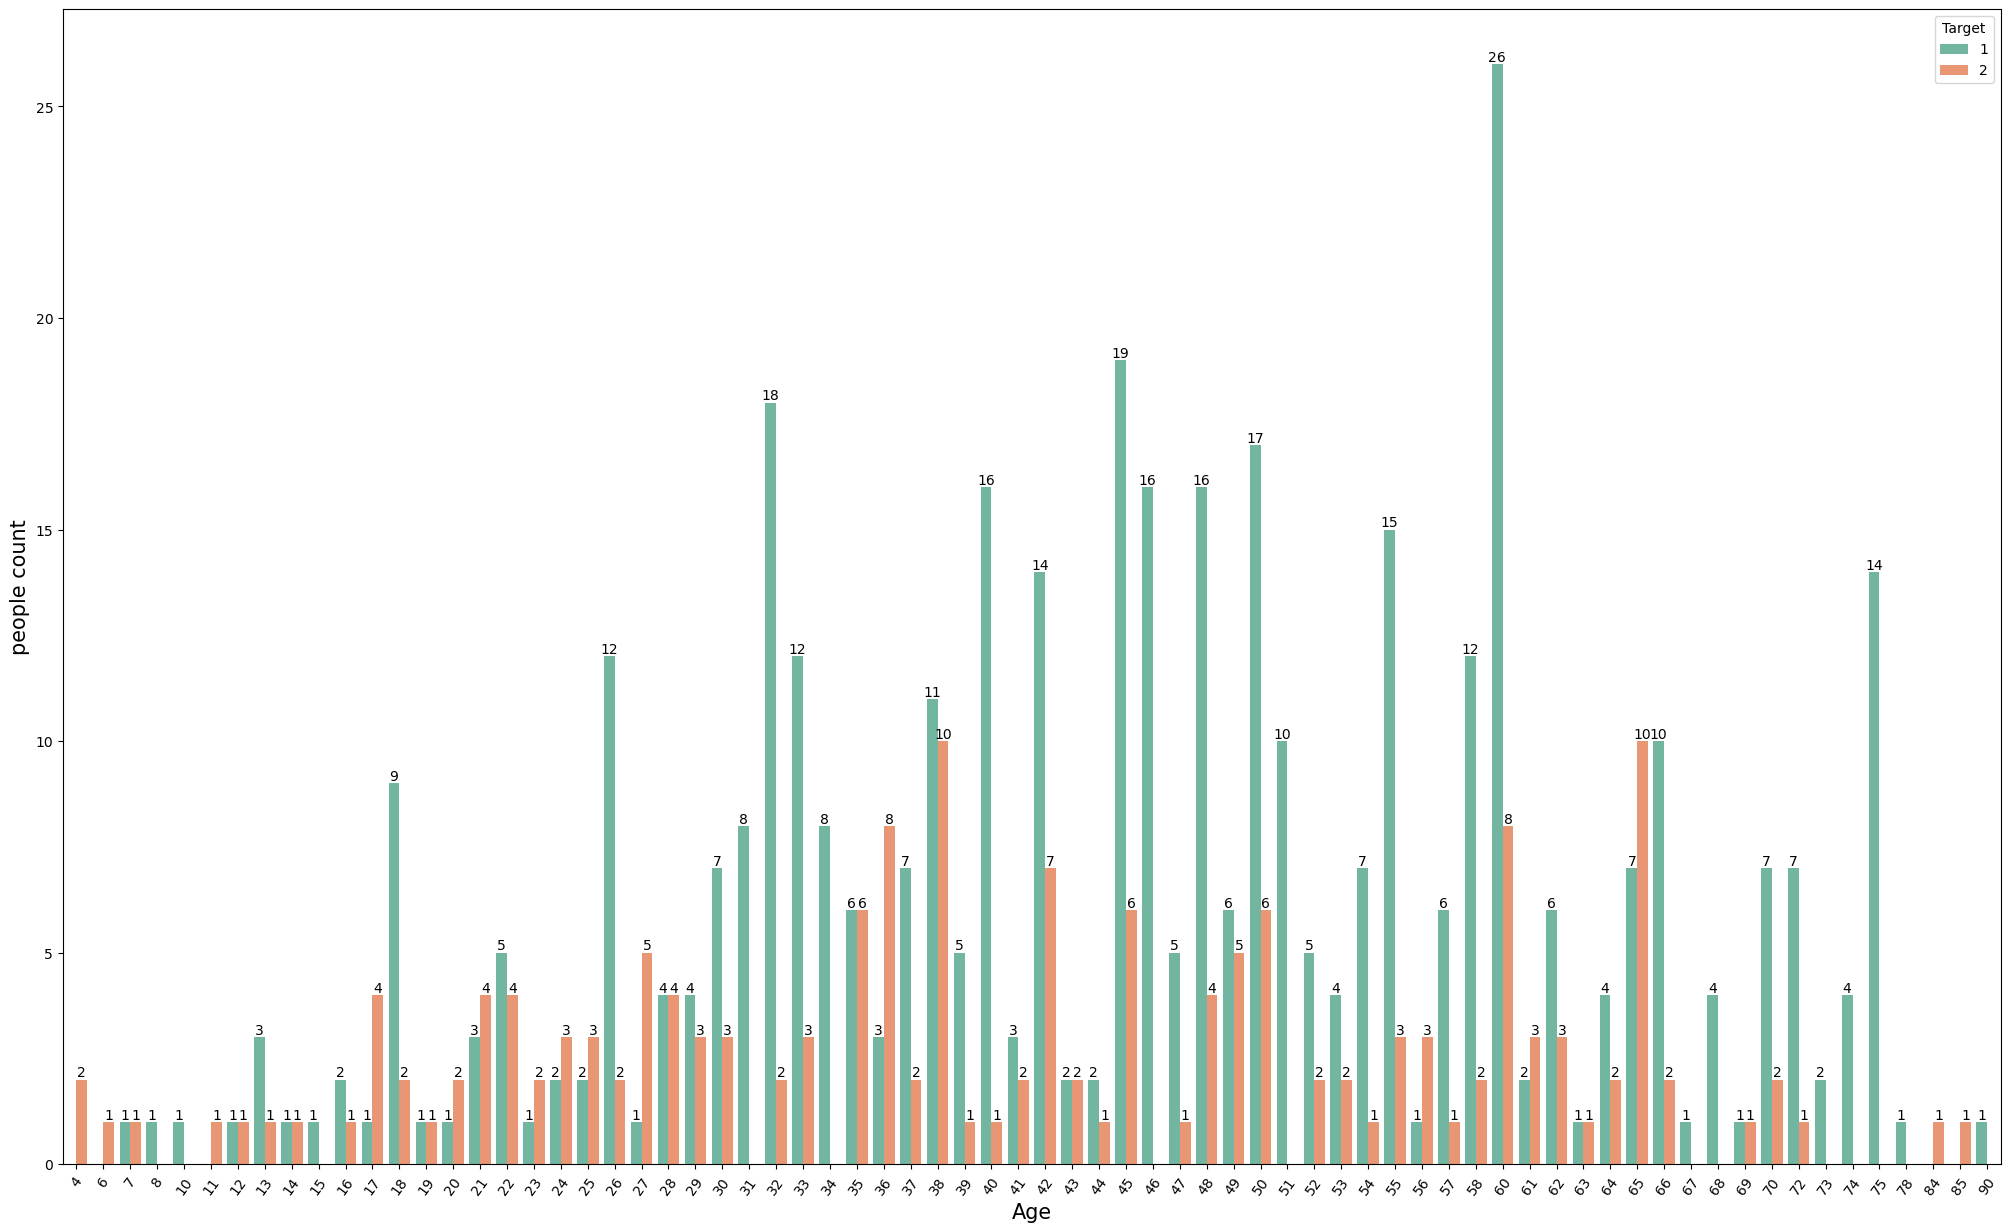

In [272]:
plt.figure(figsize=(25,15),facecolor='white')
ax=sns.countplot(x=data.Age,data=data,hue=data.Target,palette='Set2')
plt.xticks(rotation=54)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Age',fontsize=15)
plt.ylabel('people count',fontsize=15)

Text(0, 0.5, 'people count')

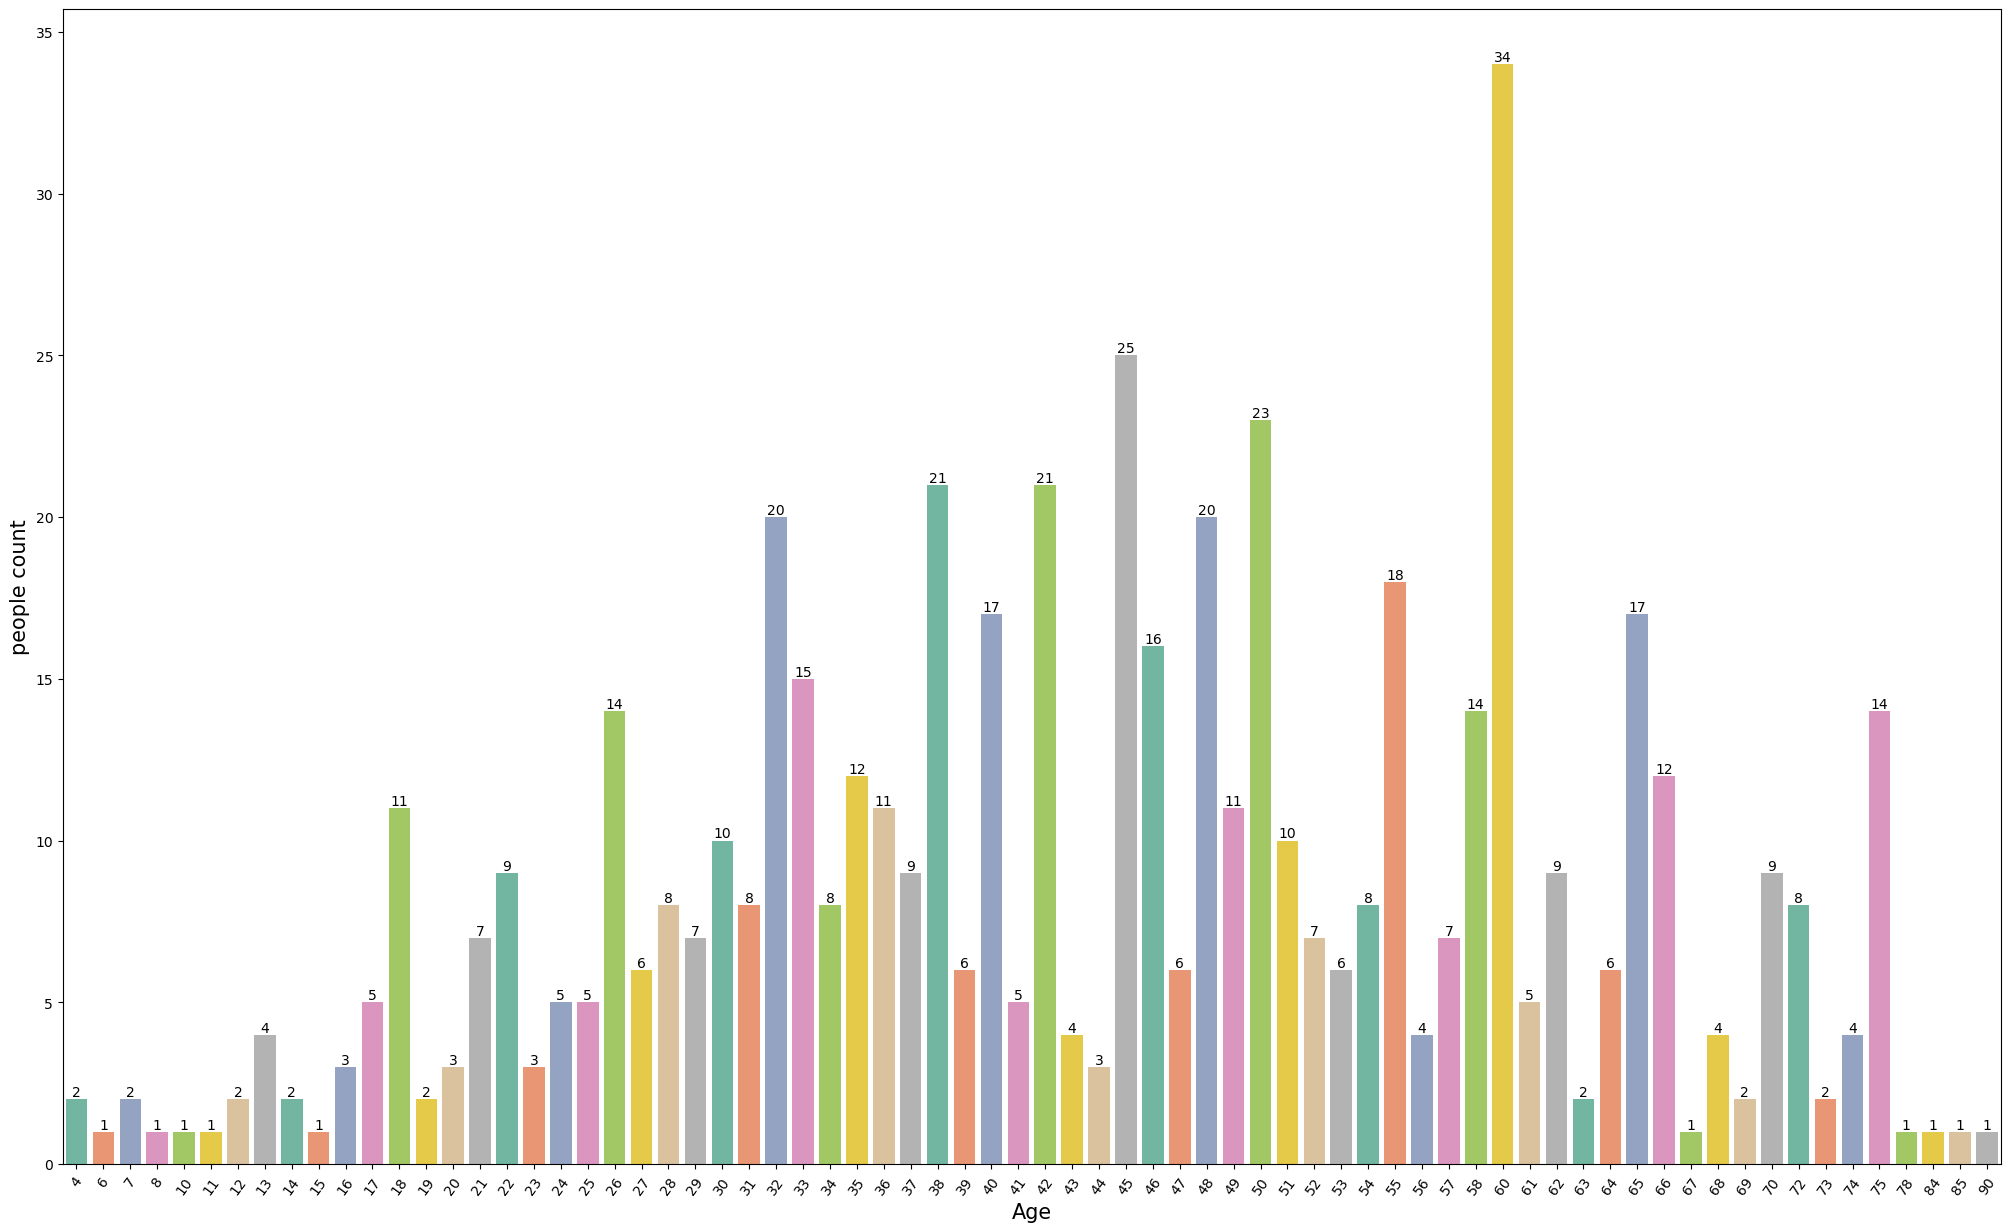

In [273]:
plt.figure(figsize=(25,15),facecolor='white')
ax=sns.countplot(x=data.Age,data=data,palette='Set2')
plt.xticks(rotation=54)
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel('Age',fontsize=15)
plt.ylabel('people count',fontsize=15)

In [ ]:
Insight-->
    From above graph

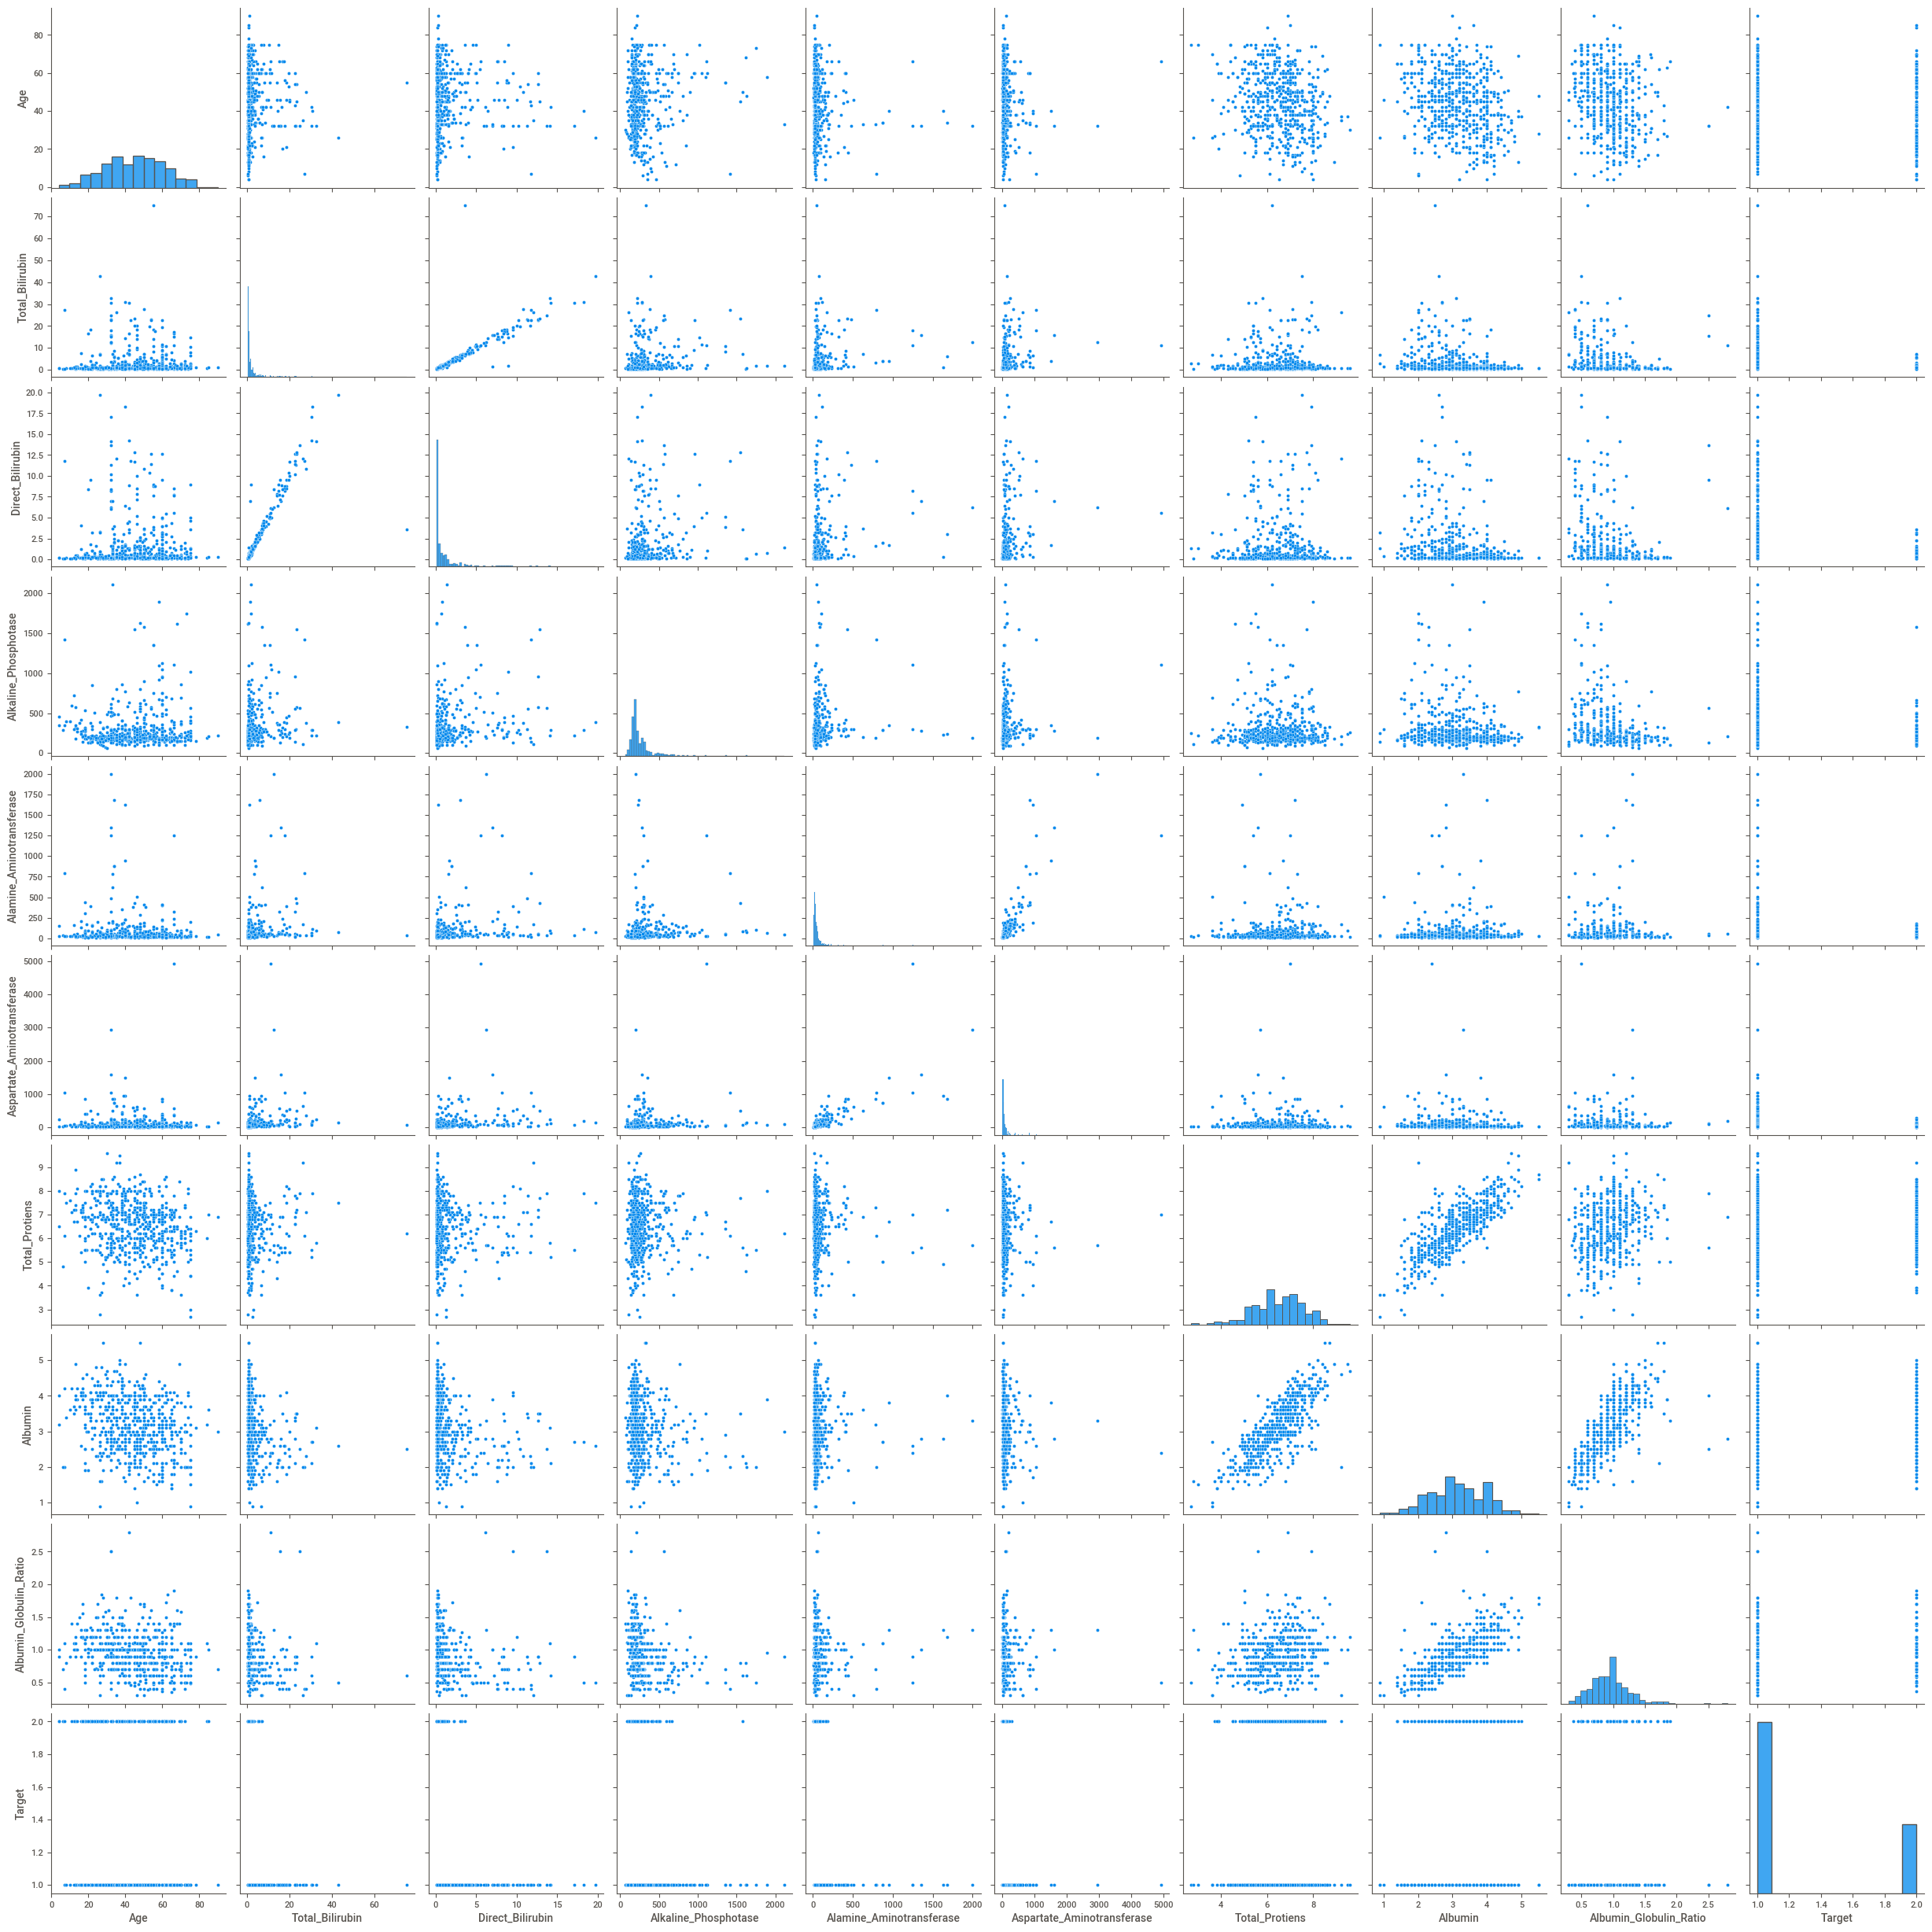

In [15]:
sns.pairplot(data)

## Data Preprocessing

In [11]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_Globulin_Ratio        4
Target                        0
dtype: int64

In [12]:
data.loc[data.Albumin_Globulin_Ratio.isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


In [13]:
# We can fill these values with the help of mean
data.loc[data.Albumin_Globulin_Ratio.isnull()==True,'Albumin_Globulin_Ratio']=data.Albumin_Globulin_Ratio.mean()
data.loc[data.Albumin_Globulin_Ratio.isnull()]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target


## Checking for Outliers

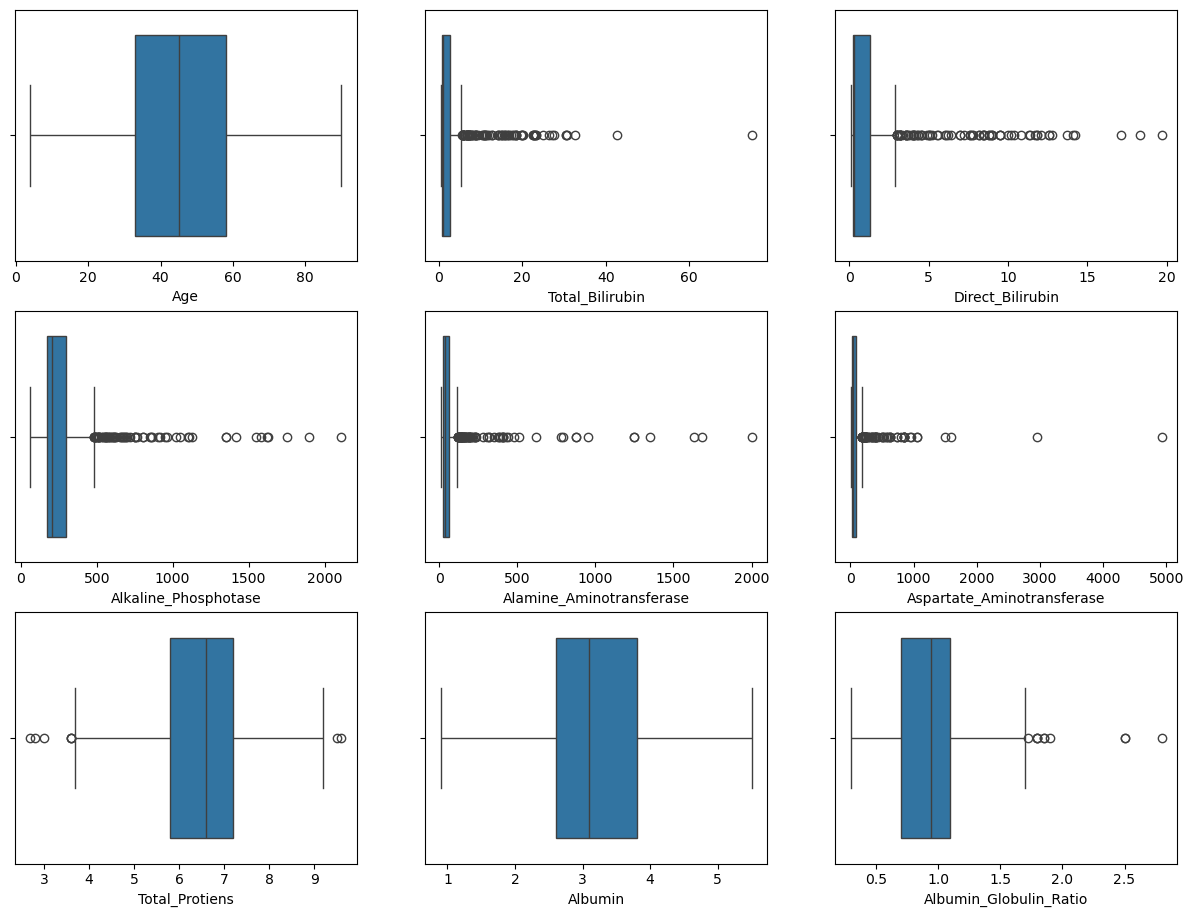

In [14]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for i in data.drop(labels=['Gender','Target'],axis=1):
    ax=plt.subplot(4,3,plotnumber)
    sns.boxplot(x=data[i])
    plt.xlabel(i)
    plotnumber+=1

Insights-->
1.Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspar  tate_Aminotransferase,Total_Protiens and Albumin_Globulin_Ratio contains outliers.    So we trying to fill thise outliers with the help of mean and median depends on its   skewness.

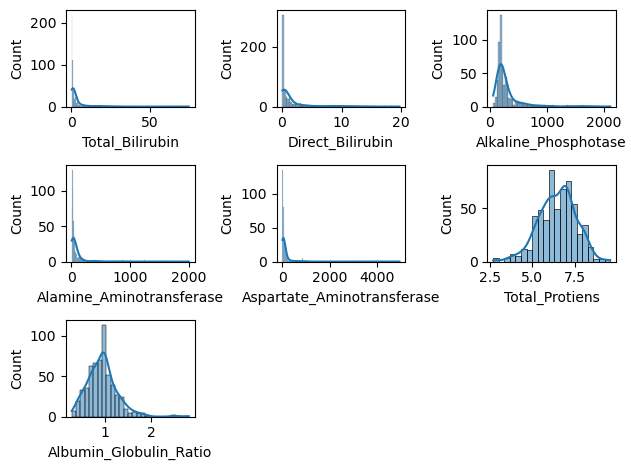

In [15]:
outliers=data[['Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin_Globulin_Ratio']]
plotnumber=1
for i in outliers:
    ax=plt.subplot(3,3,plotnumber)
    sns.histplot(outliers[i],kde=True)
    plotnumber+=1
plt.tight_layout()

Insights-->
1. From above graph you can say that graphs are heighly positivly skewed except last     two which are fairly normal.

In [16]:
q1=data.Total_Bilirubin.quantile(0.25)
q3=data.Total_Bilirubin.quantile(0.75)
print(q1)
print(q3)

0.8
2.6


In [17]:
IQR=q3-q1
print(IQR)

1.8


In [18]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

5.300000000000001
-1.9000000000000001


In [19]:
len(data.loc[data['Total_Bilirubin']>upper_limit])/len(data)*100

14.408233276157805

Above column has greater than 5% outliers heance we do not interfair it. Since our data is important.

In [20]:
q1=data.Direct_Bilirubin.quantile(0.25)
q3=data.Direct_Bilirubin.quantile(0.75)
print(q1)
print(q3)

0.2
1.3


In [21]:
IQR=q3-q1
print(IQR)

1.1


In [22]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

2.95
-1.4500000000000002


In [23]:
print(len(data.loc[data['Direct_Bilirubin']>upper_limit])/len(data)*100)
print(len(data.loc[data['Direct_Bilirubin']<lower_limit])/len(data)*100)

13.893653516295027
0.0


In [24]:
q1=data.Alkaline_Phosphotase.quantile(0.25)
q3=data.Alkaline_Phosphotase.quantile(0.75)
print(q1)
print(q3)
IQR=q3-q1
print(IQR)

175.5
298.0
122.5


In [25]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

481.75
-8.25


In [26]:
len(data.loc[data['Alkaline_Phosphotase']>upper_limit])/len(data)*100

11.83533447684391

In [27]:
q1=data.Alamine_Aminotransferase.quantile(0.25)
q3=data.Alamine_Aminotransferase.quantile(0.75)
print(q1)
print(q3)

23.0
60.5


In [28]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

244.25
-160.75


In [29]:
len(data.loc[data['Alamine_Aminotransferase']>upper_limit])/len(data)*100

4.802744425385934

In [30]:
# Here we use outliers operation

In [31]:
data.loc[data['Alamine_Aminotransferase']<upper_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [32]:
# Given feature has heighly skewed data heance we use IQR method
data.loc[data['Alamine_Aminotransferase']>upper_limit,'Alamine_Aminotransferase']=data.Alamine_Aminotransferase.median()
data.loc[data['Alamine_Aminotransferase']>upper_limit]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target


In [33]:
q1=data.Aspartate_Aminotransferase.quantile(0.25)
q3=data.Aspartate_Aminotransferase.quantile(0.75)
print(q1)
print(q3)

25.0
87.0


In [34]:
IQR=q3-q1
print(IQR)

62.0


In [35]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

180.0
-68.0


In [36]:
len(data.loc[data['Aspartate_Aminotransferase']>upper_limit])/len(data)*100

11.320754716981133

Hence we do not operate its outliers

In [37]:
q1=data.Total_Protiens.quantile(0.25)
q3=data.Total_Protiens.quantile(0.75)
print(q1)
print(q3)
IQR=q3-q1
print(IQR)

5.8
7.2
1.4000000000000004


In [38]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
print(upper_limit)
print(lower_limit)

9.3
3.6999999999999993


In [39]:
print(len(data.loc[data['Total_Protiens']>upper_limit])/len(data)*100)
print(len(data.loc[data['Total_Protiens']<lower_limit])/len(data)*100)

0.34305317324185247
1.0291595197255576


In [40]:
data.loc[data['Total_Protiens']>upper_limit,'Total_Protiens']=data.Total_Protiens.median()
data.loc[data['Total_Protiens']<lower_limit,'Total_Protiens']=data.Total_Protiens.median()

In [41]:
data.Albumin_Globulin_Ratio.skew()
# we use 3 sigma rule

0.9957034104499916

In [42]:
lower_limit=data.Albumin_Globulin_Ratio.mean()-3*data.Albumin_Globulin_Ratio.std()
upper_limit=data.Albumin_Globulin_Ratio.mean()+3*data.Albumin_Globulin_Ratio.std()
print(upper_limit)
print(lower_limit)

1.9025397816575431
-0.008411975094503643


In [43]:
print(len(data.loc[data['Albumin_Globulin_Ratio']>upper_limit])/len(data)*100)
print(len(data.loc[data['Albumin_Globulin_Ratio']<lower_limit])/len(data)*100)

0.5145797598627788
0.0


Given feature has greater than 5 percent outliers hence we do not operate it.

## Label Encoding

In [44]:
# The target values are in 1 and 2 which may get error in next model so we convert 
# 2 in 0
data.loc[data['Target']==2,'Target']=0

In [45]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [46]:
data.Gender=lb.fit_transform(data.Gender)

In [47]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## Feture Selaction

<Axes: >

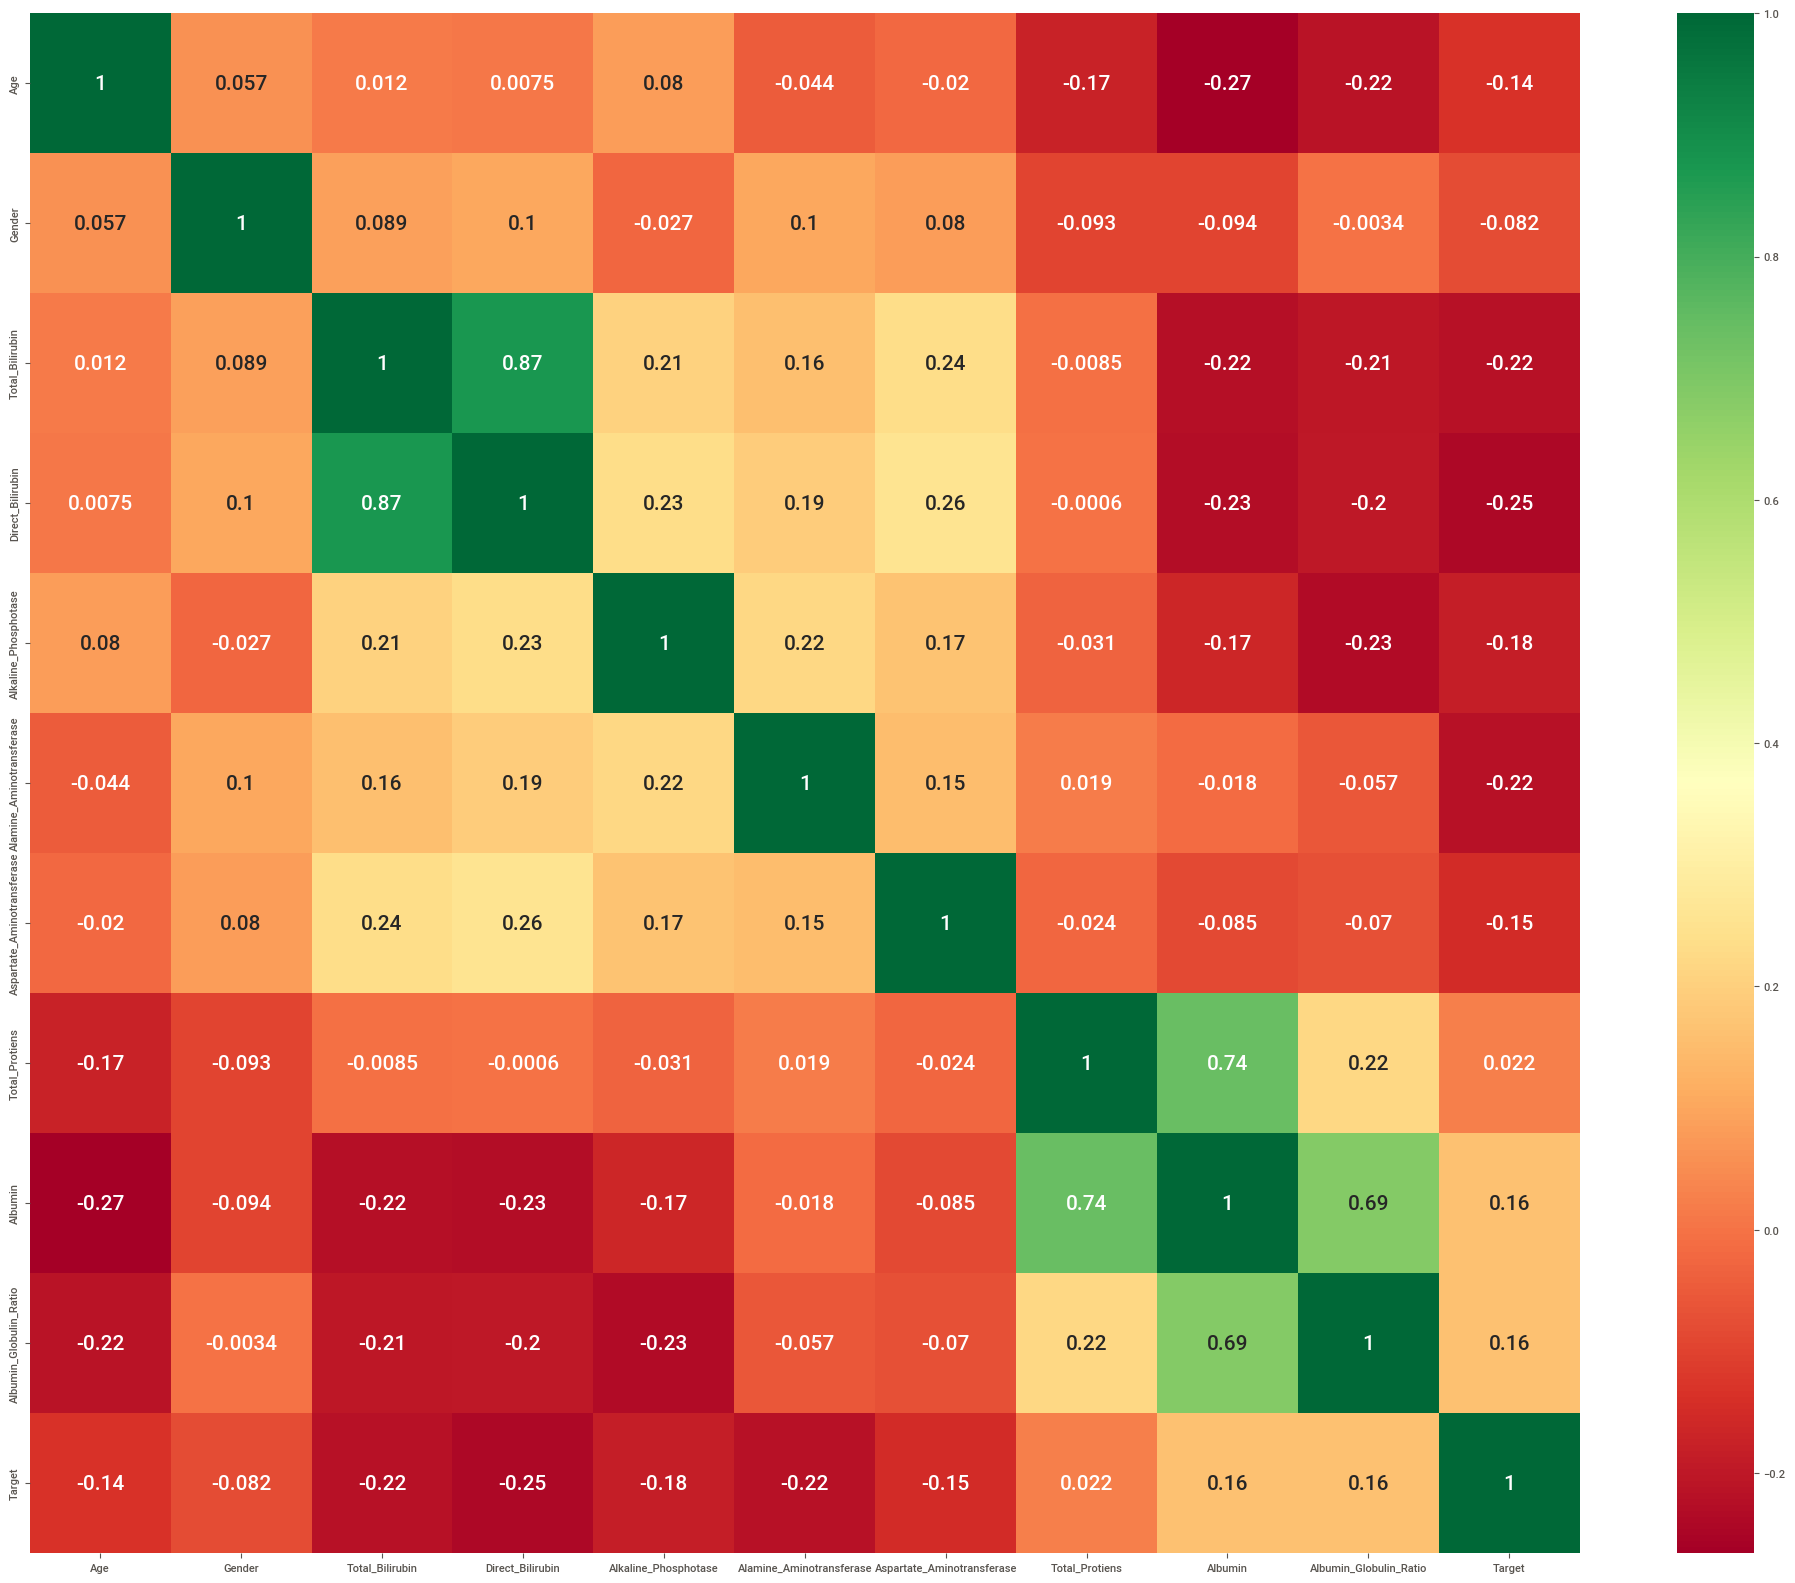

In [52]:
plt.figure(figsize=(25,20),facecolor='white')
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',annot_kws={'size':15})

In [48]:
data.drop('Direct_Bilirubin',axis=1,inplace=True)

## Model Selection

In [49]:
x=data.drop('Target',axis=1)
y=data.Target

In [50]:
print(x.shape)
print(y.shape)

(583, 9)
(583,)


In [51]:
# scaling the data
# we have skewed data hance we use min max scaler
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
data[['Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_Globulin_Ratio']]=mn.fit_transform(data[['Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_Globulin_Ratio']])

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=25,test_size=0.20)

In [53]:
print(x_train.shape)
print(x_test.shape)

(466, 9)
(117, 9)


In [54]:
data.head()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_Globulin_Ratio,Target
0,65,0,0.004021,0.060576,0.026906,0.001626,0.563636,0.521739,0.240,1
1,62,1,0.140751,0.310699,0.242152,0.018296,0.690909,0.500000,0.176,1
2,62,1,0.092493,0.208598,0.224215,0.011791,0.600000,0.521739,0.236,1
3,58,1,0.008043,0.058134,0.017937,0.002033,0.563636,0.543478,0.280,1
4,72,1,0.046917,0.064485,0.076233,0.009961,0.654545,0.326087,0.040,1


In [55]:
data.Target.value_counts()

1    416
0    167
Name: Target, dtype: int64

In [56]:
# We use smote method
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_smote,y_smote=sm.fit_resample(x_train,y_train)

In [57]:
from collections import Counter
print(Counter(y_smote))

Counter({1: 328, 0: 328})


## importing Models

## Logistic Regression

In [58]:
# importing logistic model
from sklearn.linear_model import LogisticRegression

In [59]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_predict_lr=lr.predict(x_test)

In [64]:
# we have too see how accurate our model
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [65]:
print('accuracy_score:',accuracy_score(y_test,y_predict_lr))
print('f1_score:',f1_score(y_test,y_predict_lr))
print('classification_score:',classification_report(y_test,y_predict_lr))

accuracy_score: 0.7606837606837606
f1_score: 0.8585858585858586
classification_score:               precision    recall  f1-score   support

           0       0.57      0.14      0.22        29
           1       0.77      0.97      0.86        88

    accuracy                           0.76       117
   macro avg       0.67      0.55      0.54       117
weighted avg       0.72      0.76      0.70       117



## K-Nearest Neighbors

In [66]:
# Random knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_predict_knn=knn.predict(x_test)
print(accuracy_score(y_test,y_predict_knn))
print(f1_score(y_test,y_predict_knn))

0.6239316239316239
0.6944444444444445


In [97]:
# with the help of elbow technique
error_rate=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error_rate.append(np.mean(pred_i!=y_test))

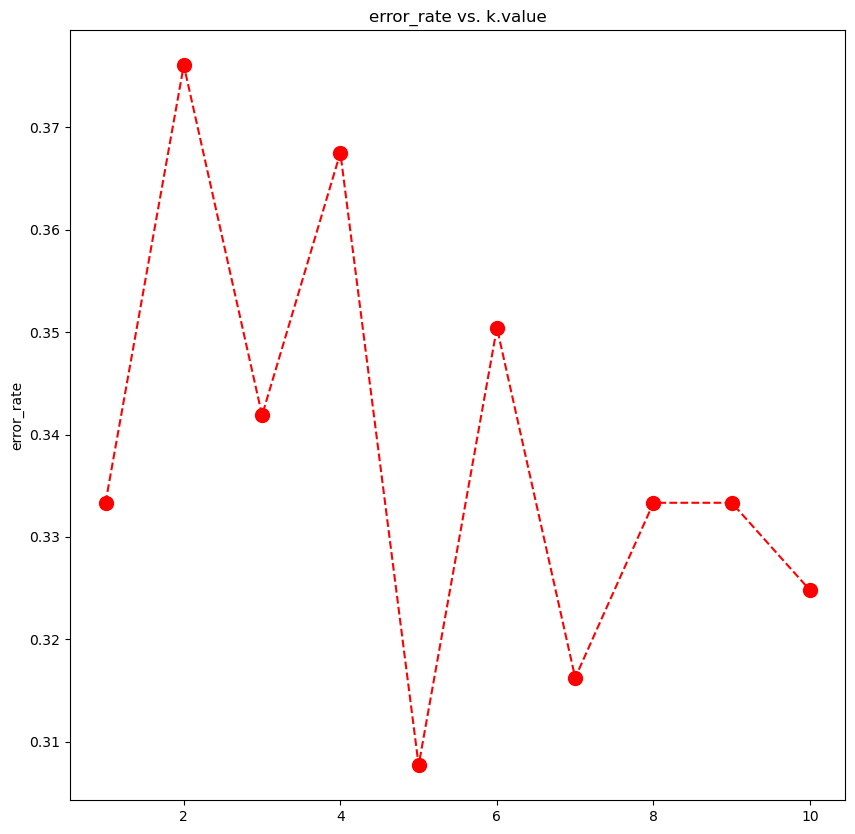

In [99]:
plt.figure(figsize=(10,10),facecolor='white')
plt.plot(range(1,11),error_rate,linestyle='dashed',marker='o',markersize=10,color='red')
plt.title('error_rate vs. k.value')
plt.ylabel('error_rate')
plt.show()

In [104]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

In [105]:
print('accuracy_score:',accuracy_score(y_test,y_pred_knn))
print('f1_score:',f1_score(y_test,y_pred_knn))
print('classification_score:',classification_report(y_test,y_pred_knn))

accuracy_score: 0.6923076923076923
f1_score: 0.797752808988764
classification_score:               precision    recall  f1-score   support

           0       0.37      0.34      0.36        29
           1       0.79      0.81      0.80        88

    accuracy                           0.69       117
   macro avg       0.58      0.58      0.58       117
weighted avg       0.69      0.69      0.69       117



## Support Vector Machine

In [106]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_predict_svc=svc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,y_predict_svc))
print('f1_score:',f1_score(y_test,y_predict_svc))
print('classification_score:',classification_report(y_test,y_predict_svc))

accuracy_score: 0.7521367521367521
f1_score: 0.8585365853658536
classification_score:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.75      1.00      0.86        88

    accuracy                           0.75       117
   macro avg       0.38      0.50      0.43       117
weighted avg       0.57      0.75      0.65       117



In [108]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=svc,param_grid={'C':[0.001,1,0.1,5,10,13],'gamma':[0.001,0.1,0.23,0.28,0.06,0.92],'random_state':list(range(1,50))},refit=True,verbose=2,scoring='f1',cv=8)

In [109]:
grid.fit(x_train,y_train)

Fitting 8 folds for each of 1764 candidates, totalling 14112 fits
[CV] END ...............C=0.001, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...............C=0.001, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...............C=0.001, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...............C=0.001, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...............C=0.001, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...............C=0.001, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...............C=0.001, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...............C=0.001, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...............C=0.001, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...............C=0.001, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...............C=0.001, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ...............C=0.001, gamma=0.00

GridSearchCV(cv=8, estimator=SVC(),
             param_grid={'C': [0.001, 1, 0.1, 5, 10, 13],
                         'gamma': [0.001, 0.1, 0.23, 0.28, 0.06, 0.92],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='f1', verbose=2)

In [110]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'random_state': 1}

In [111]:
clf=SVC(C=1,gamma=0.1,random_state=1)

In [112]:
clf.fit(x_train,y_train)
y_predict_svc=clf.predict(x_test)
print(accuracy_score(y_test,y_predict_svc))

0.7606837606837606


In [132]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_predict_dt=dt.predict(x_test)
print(accuracy_score(y_test,y_predict_dt))

0.6666666666666666


In [142]:
from sklearn.model_selection import RandomizedSearchCV
param_distribution={'criterion':('gini','entropy'),'splitter':('best','random'),'max_depth':[1,2,5,13,15],'min_samples_leaf':[1,2,5,10,15,22],'min_samples_split':[2,3,4,5,6,7]}

In [143]:
dt1=DecisionTreeClassifier(random_state=3)
random_dt=RandomizedSearchCV(estimator=dt1,param_distributions=param_distribution,scoring='accuracy',n_jobs=-1,verbose=2,cv=3,n_iter=100)

In [144]:
random_dt.fit(x_train,y_train)
random_dt.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'splitter': 'random',
 'min_samples_split': 4,
 'min_samples_leaf': 22,
 'max_depth': 2,
 'criterion': 'entropy'}

In [170]:
dt2=DecisionTreeClassifier(splitter='random',min_samples_split=4,min_samples_leaf=22,max_depth=2,criterion='entropy')
dt2.fit(x_train,y_train)
y_pred_dt2=dt2.predict(x_test)
accuracy_score(y_test,y_pred_dt2)

0.7521367521367521

In [197]:
from sklearn.model_selection import GridSearchCV
param_distribution={'criterion':('gini','entropy'),'min_samples_leaf':[1,4,6,9,12,5,13,15],'min_samples_split':[2,3,4,9],'max_depth':[2,4,6,11,3,7,5],'splitter':('best','random')}

In [198]:
grid=GridSearchCV(estimator=dt,param_grid=param_distribution,scoring='f1',n_jobs=-1,verbose=2,cv=5)

In [216]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 896 candidates, totalling 4480 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 4, 6, 11, 3, 7, 5],
                         'min_samples_leaf': [1, 4, 6, 9, 12, 5, 13, 15],
                         'min_samples_split': [2, 3, 4, 9],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=2)

In [217]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'splitter': 'random'}

In [220]:
dt3=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=5,min_samples_split=3,splitter='random')

In [224]:
dt3.fit(x_train,y_train)
y_predict_dt3=dt3.predict(x_test)
print(accuracy_score(y_test,y_predict_dt3))
print(f1_score(y_test,y_predict_dt3))

0.7521367521367521
0.8585365853658536


## Random Forest

In [229]:
from sklearn.ensemble import RandomForestClassifier
rd=RandomForestClassifier()
rd.fit(x_train,y_train)
y_predict_rd=rd.predict(x_test)
print(accuracy_score(y_test,y_predict_rd))

0.7606837606837606


In [231]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(10,110,num=11)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(1,25,num=11)]
max_depth.append(None)
min_samples_split=[1,2,5,6,10,7,4,11,14,18,22,15]
min_samples_leaf=[1,2,4,6,3]
bootstrap=[True,False]
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split,'bootstrap':bootstrap}

In [278]:
rdf=RandomForestClassifier(random_state=34)
rdf_randomize=RandomizedSearchCV(estimator=rdf,scoring='f1',param_distributions=random_grid,n_iter=100,cv=5,verbose=1,random_state=54,n_jobs=-1)

In [279]:
rdf_randomize.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=34),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 3, 5, 8, 10, 13, 15,
                                                      17, 20, 22, 25, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6, 3],
                                        'min_samples_split': [1, 2, 5, 6, 10, 7,
                                                              4, 11, 14, 18, 22,
                                                              15],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100,
                                                         110]},
                   random_state=54, scoring='f1', verbose=1)

In [280]:
rdf_randomize.best_params_

{'n_estimators': 40,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 1,
 'bootstrap': False}

In [281]:
rdf1=RandomForestClassifier(n_estimators=40,min_samples_split=5,min_samples_leaf=4,max_features='auto',max_depth=1,bootstrap=False)

In [288]:
rdf1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=1, max_features='auto',
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=40)

In [290]:
y_predict_rdf1=rdf1.predict(x_test)
print(accuracy_score(y_test,y_predict_rdf1))
print(f1_score(y_test,y_predict_rdf1))

0.7521367521367521
0.8585365853658536


## Bagging Technique

In [296]:
from sklearn.ensemble import BaggingClassifier
model_bagg=BaggingClassifier(base_estimator=rdf,n_estimators=10)
model_bagg.fit(x_train,y_train)
y_pred_bagg=model_bagg.predict(x_test)
print(accuracy_score(y_test,y_pred_bagg))
print(f1_score(y_test,y_pred_bagg))

0.7777777777777778
0.8602150537634408


## XGBoost

In [299]:
from xgboost import XGBClassifier
xgb_r=XGBClassifier()
xgb_r.fit(x_smote,y_smote)
y_pred_xb=xgb_r.predict(x_test)
print(accuracy_score(y_test,y_pred_xb))
print(f1_score(y_test,y_pred_xb))
print(classification_report(y_test,y_pred_xb))

0.7606837606837606
0.839080459770115
              precision    recall  f1-score   support

           0       0.52      0.55      0.53        29
           1       0.85      0.83      0.84        88

    accuracy                           0.76       117
   macro avg       0.68      0.69      0.69       117
weighted avg       0.77      0.76      0.76       117



In [300]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={'gamma':[0,0.1,0.2,0.002,2.7,30,12,23],'reg_alpha':[0.1,0.2,0.4,0.8,1.1,3.2,6.4,8.25,23,51,66],'reg_lamda':[0,0.1,0.8,1.1,3.2,6.4,8.25,23,51,66],'n_estimators':[50,65,80,100,11,115,30,26],'max_depth':[5,6,8,9,12,14,17,19,22]}

In [301]:
xgb=XGBClassifier(random_state=42,verbosity=2)
rcv=RandomizedSearchCV(estimator=xgb,scoring='accuracy',param_distributions=param_grid,n_iter=100,cv=3,verbose=2,random_state=24,n_jobs=-1)

In [302]:
rcv.fit(x_train,y_train)
rcv.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'reg_lamda': 3.2,
 'reg_alpha': 1.1,
 'n_estimators': 115,
 'max_depth': 17,
 'gamma': 30}

In [303]:
xgb1=XGBClassifier(reg_lambda=3.2,reg_alpha=1.1,n_estimators=115,max_depth=17,gamma=30)
xgb1.fit(x_train,y_train)
xgb_1=xgb1.predict(x_test)
print(accuracy_score(y_test,xgb_1))

0.7521367521367521


## Gradient Boosting

In [317]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(n_estimators=250)
gbm.fit(x_train,y_train)
y_gbm=gbm.predict(x_test)
print(accuracy_score(y_test,y_gbm))

0.7948717948717948


In [340]:
from sklearn.neural_network import MLPClassifier
nlp=MLPClassifier(hidden_layer_sizes=(30,5),learning_rate_init=0.1,max_iter=70,random_state=45)
nlp.fit(x_train,y_train)
y_pred_ann=nlp.predict(x_test)
print(accuracy_score(y_test,y_pred_ann))

0.7521367521367521
